# Chapter 9: Face Detection - Haar - LBP

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd /content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_5/Chapter9

/content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_5/Chapter9


In [3]:
# Download source
# https://github.com/opencv/opencv/tree/master/data/haarcascades

In [4]:
 import warnings 
 warnings.filterwarnings('ignore')

In [5]:
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers 
import time
%matplotlib inline

In [6]:
 cv2.__version__

'4.1.2'

# HAAR

In [10]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
#load test image
test1 = cv2.imread('FaceDetection/baby.jpg')
#convert the test image to gray image as opencv face detector expects gray image 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

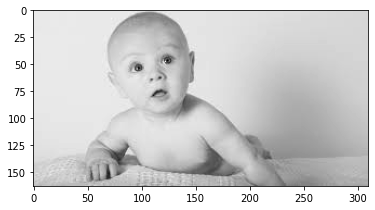

In [12]:
#if you have matplotlib installed then
plt.imshow(gray_img, cmap='gray')
# or display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [18]:
#load cascade classifier training file for haarcascade
#haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
haar_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [19]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor = 1.1, minNeighbors = 5)

In [20]:
#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [21]:
# go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
  cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

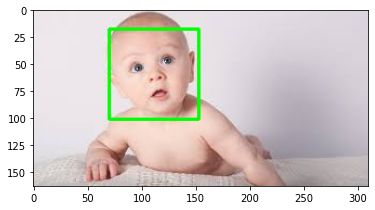

In [22]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test1))

* scaleFactor: Tham số chỉ định kích thước hình ảnh được giảm bao nhiêu ở mỗi tỷ lệ hình ảnh. Giả sử, hệ số tỷ lệ là 1.03, nghĩa là đang sử dụng một bước nhỏ để thay đổi kích thước, tức là giảm kích thước xuống 3%, tăng cơ hội tìm thấy kích thước phù hợp với mô hình để phát hiện.
* minNeighbors: Tham số chỉ định số lượng hàng xóm mà mỗi hình chữ nhật ứng viên phải có. Tham số này sẽ ảnh hưởng đến chất lượng của các khuôn mặt được phát hiện: giá trị cao hơn dẫn đến ít phát hiện hơn nhưng chất lượng cao hơn. Default = 5.

In [25]:
# Hàm tổng, gồm các hàm nhỏ phía trên
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
  #just making a copy of image passed, so that passed image is not changed 
  img_copy = colored_img.copy()
  
  #convert the test image to gray image as opencv face detector expects gray i
  gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
  
  #let's detect multiscale (some images may be closer to camera than others) i
  faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)
  faces_found = len(faces)
    
  #go over list of faces and draw them as rectangles on original colored img
  for (x, y, w, h) in faces:
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
  return img_copy, faces_found

In [27]:
#load another image
test2 = cv2.imread('FaceDetection/baby2.jpg')
#call our function to detect faces
faces_detected_img, faces_found = detect_faces(haar_face_cascade, test2)

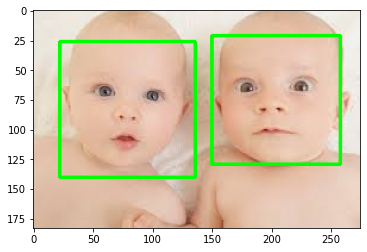

In [28]:
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [29]:
#print the number of faces found
print('Faces found: ', faces_found)

Faces found:  2


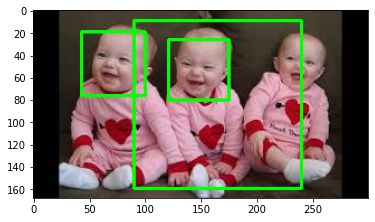

In [41]:
#load another image
test3 = cv2.imread('FaceDetection/triple.jpg')
#call our function to detect faces
faces_detected_img_3, faces_found_3 = detect_faces(haar_face_cascade,test3)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img_3))

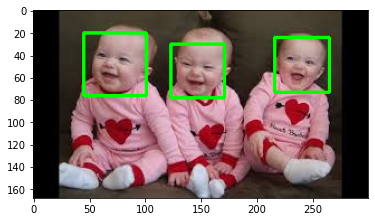

In [43]:
#load another image
test3 = cv2.imread('FaceDetection/triple.jpg')
#call our function to detect faces
faces_detected_img_3, faces_found_3 = detect_faces(haar_face_cascade,test3,scaleFactor = 1.15)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img_3))

 # LBP

In [44]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml') # ...
# load another image
test3 = cv2.imread('FaceDetection/triple.jpg')
# call our function to detect faces
faces_detected_img_4, faces_found_4 = detect_faces(lbp_face_cascade,
                                                   test3,
                                                   scaleFactor = 1.05)

(-0.5, 299.5, 167.5, -0.5)

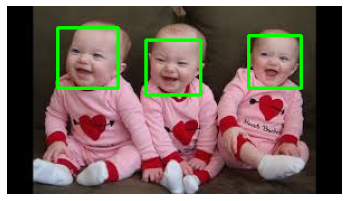

In [45]:
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img_4))
plt.axis('off')

In [47]:
faces_found_4

3